<h1><center>Natural Language Enginering </center></h1>
<h2><center>Assignment</center></h2>

---
<center > <font size= '+2' >Opinion extractor using tweets</font></center>




In [19]:
import sys
sys.path.append(r'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources')
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from collections import defaultdict,Counter
from itertools import zip_longest
from IPython.display import display
from random import seed
get_ipython().magic('matplotlib inline')
import random
import math
import matplotlib.pylab as pylab
%matplotlib inline
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
from pylab import rcParams
from operator import itemgetter, attrgetter, methodcaller
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import csv

import spacy
from sussex_nltk.corpus_readers import AmazonReviewCorpusReader

nlp = spacy.load('en')
dvd_reviews = [review for review in AmazonReviewCorpusReader().category("dvd").raw()]
parsed_reviews = [nlp(review) for review in dvd_reviews]

core = [("A.1","It has an exciting fresh plot.",set(["fresh", "exciting"])),
        ("B.1","The plot was dull.",set(["dull"])),
        ("C.1","It has an excessively dull plot.",set(["excessively-dull"])),
        ("C.2","The plot was excessively dull.",set(["excessively-dull"])),
        ("D.1","The plot wasn't dull.",set(["not-dull"])),
        ("D.2","It wasn't an exciting fresh plot.",set(["not-exciting", "not-fresh"])),
        ("D.3","The plot wasn't excessively dull.",set(["not-excessively-dull"])),
        ("E.1","The plot was cheesy, but fun and inspiring.",set(["cheesy", "fun", "inspiring"])),
        ("E.2","The plot was really cheesy and not particularly special.",set(["really-cheesy", "not-particularly-special"]))
       ]

## Section 1 
In Topic 3 I investigated the impact of different actions (altering data, extracting features, etc.) on two very different mechanisms of document classification: wordlist based classifier,  and Naïve Bayes classifier. The data that was provided and used throughout this section is a collection of Amazon product reviews in 4 different categories (domains). The full data set has 1000 positive and 1000 negative reviews for each category. For sections 1.1 and 1.2 I used Amazon reviews in category 'dvd'.
### 1.1
To investigate the difference in classifiers' performance, I ran both of them on some fixed amount of training and testing data (70% of overall data used for training, 30% for testing) and calculated the average accuracy across multiple runs.

(The size of words list for WL classifier is 100)
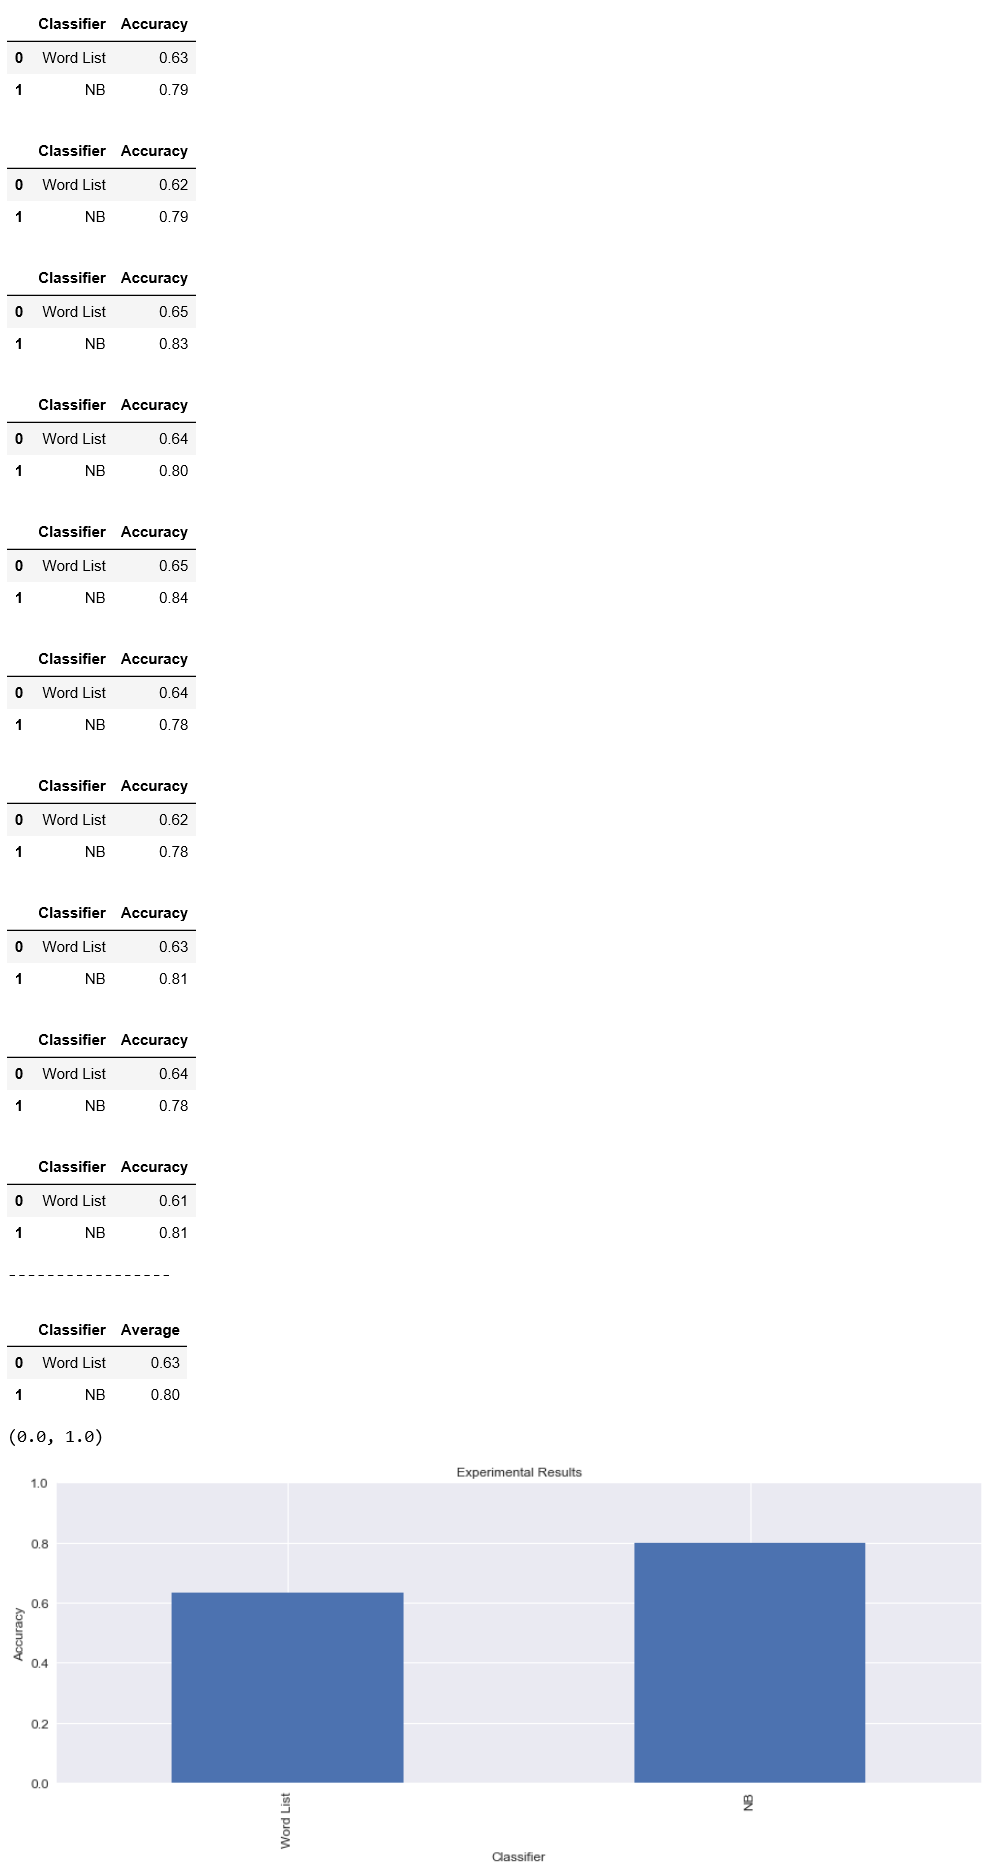

As we can see, the Naïve Bayes classifier is clearly a better (~17% on average) performer here. Such difference in performance is a consequence of two very different assumptions that BN and WL make about the words encountered in the documents.

We know that the wordlist classifier requires two list of words describing positive and negative sentiment (both lists derived from training data). Thus, wordlist classifier determines the overall sentiment of a document (from testing data) based on numbers of occurrences of words that occur in the two lists. The Naïve Bayes classifier takes a more scientific and mathematical approach, taking into consideration the probability of a document being positive or negative and the probability of individual words describing positive or negative sentiment. 
Although, the assumption made by the WL classifier is simple, it is much less reliable than NB's method for multiple reasons:
- the lists that WL refers to, to determine the sentiment may not even contain any words that actually describe the sentiment. Because it only considers, for example, 100 most common words in training data (although, increasing the size of the lists slightly improves WL's performance, see example below), the information that WL uses to identify the sentiment is incomplete. NB, on the other hand, considers all of the words in training data and their probabilities being of a certain class (sentiment) + overall probability of some document being either a positive or a negative review. So essentially, NB has more information to work with when determining the sentiment.

(For this test the size of the words list was increased from 100 to 300.)
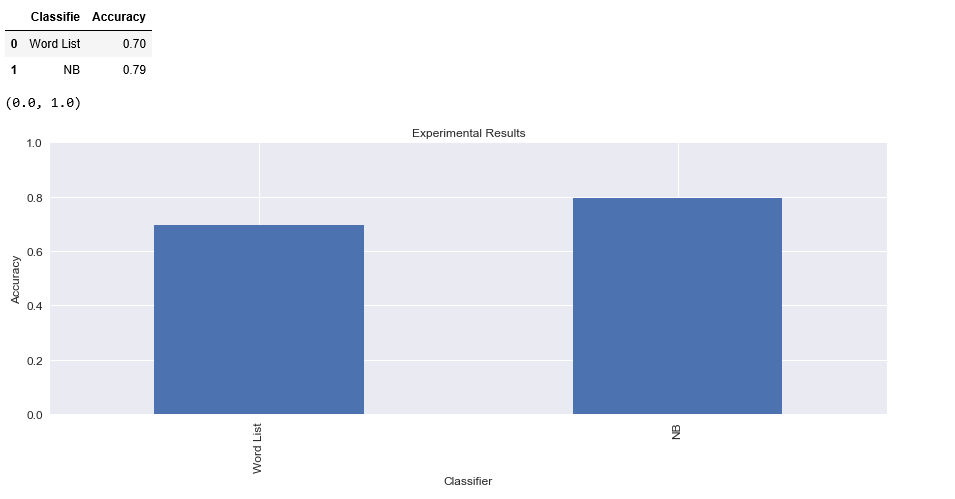

- based on topic 2, when WL classifier fails to determine the sentiment, it picks the sentiment randomly. So the probability of a document to be classified correctly is 50%, which is not reliable enough. Whereas NB always has a justified (may be not always correctly) preference for one of the sentiments. 

It should also be noted that neither of the classifiers ever have a 100% accuracy.

### 1.2
For evaluating WL's and NB's performance with varying training data, I created a list of sample sizes that represent different amounts of training data. As the code executes, the classifiers switch from one sample size to another, one by one, once again calculating average accuracies. 

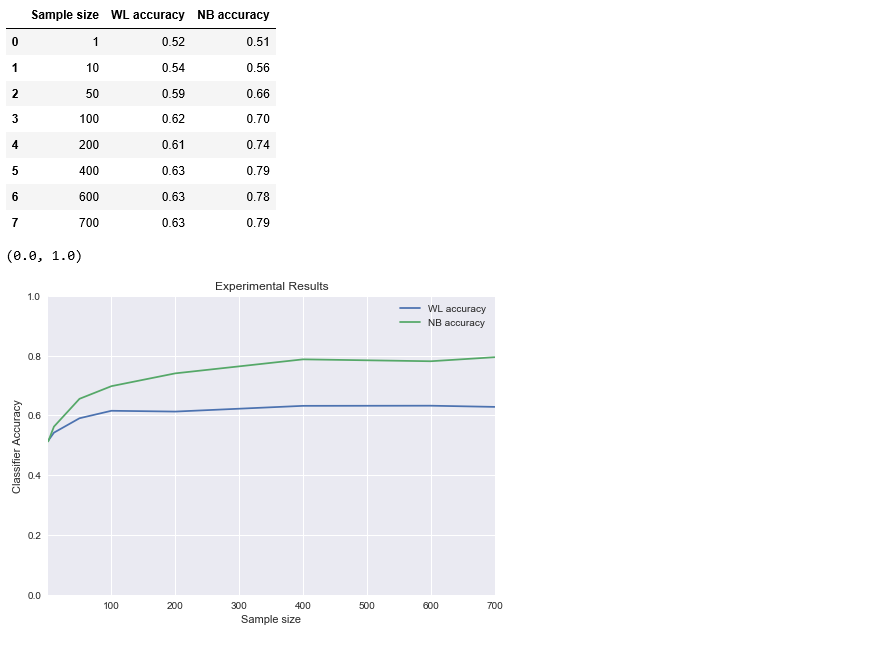

As we can see from the graph and table above, the amount of training data has a major effect on both classifiers' performance, especially on Naïve Bayes. 

As the amount of training data grows, the accuracy of NB increases accordingly (from ~51% in for training data size 1, to ~79% for the size 700), but evens out on the last 3 sample sizes. Such growth in accuracy of NB can be explained by the fact that it is essentially a machine learning algorithm, so the more data we give it to train on, the better it preforms. For the last 3 sample sizes though, the growth in accuracy is insignificant beyond certain amount, from which we can conclude that NB already reaches its peak performance (at least in our example) with just about a half of the overall data used for training. From this, I also  assume, that increasing the amount of training data even further will either have almost no effect on the accuracy, or the growth will be insignificant.
The results are not that impressive for the wordlist classifier. Because of the issues addressed in the previous sub-section, WL's list of words doesn't seem to update much as the amount of training data increases (the list of 100 most common words, for example will mostly contain the same information). The overall growth of accuracy from the smallest to largest amount of training data is only around 10%, but it also evens out after a certain point, even earlier than the Naive Bayes classifier.

Interestingly enough, both WL and NB classifier have almost identical accuracy having the smallest amount of training data.

### 1.3
To investigate the impact on Naive Bayes classifier training and testing data originate from different domains, for each domain's training data, I paired it with testing data from every given domain. This gives us 16 pairs of source-target domains (source being training data of one domain, and target being the data for testing from other domain). Again, we run the classifier several times and calculate average accuracy.

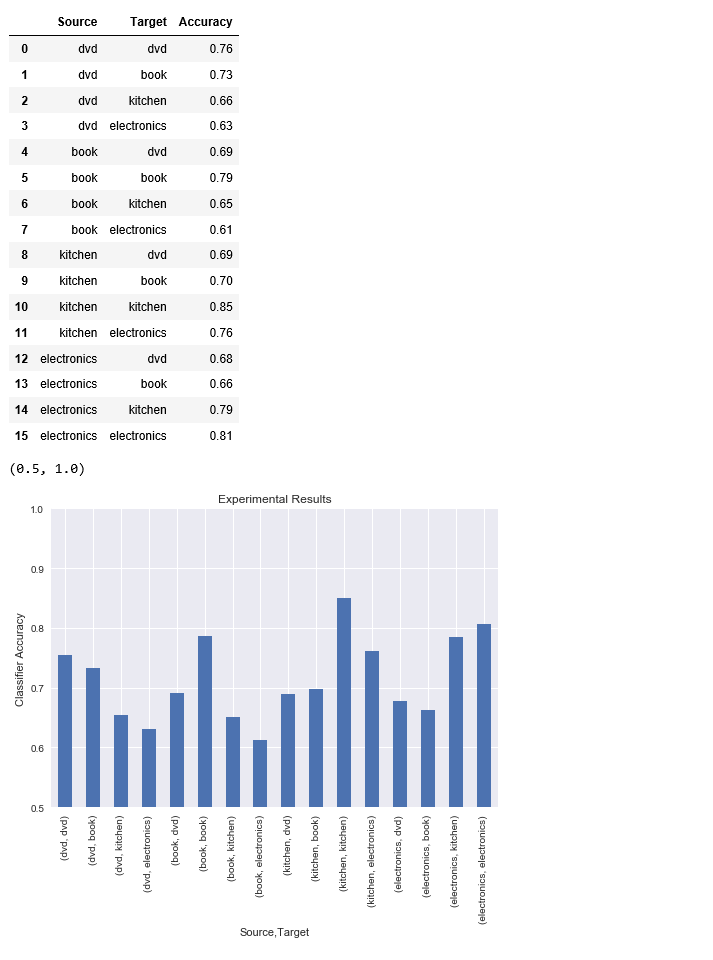

Obviously, the classifier shows the highest accuracy when training and testing domains match, which we can see on the graph above. It is also obvious, that with cross-domain classification, the accuracy decreases. Although, the graph shows that for some non-matching source-target pairs of domains, the accuracy is higher than for other pairs. For example, the accuracy for dvd-book pair is pretty close to the accuracy if the dvd-dvd pair. At the same time training the classifier on data from book domain, and testing it on electronics domain results in relatively low accuracy of only ~61%. My assumption is that such diversity in accuracy is the result of either "high or low level" of reciprocal relevance of content in two domains. For instance, it is unlikely for book domain to have enough information that would be relevant in kitchen domain for the accuracy to be high. 
There also cases when switching domains (dvd-book - book-dvd, book-kitchen - kitchen-book) has a major impact on classifier's performance. In some way, we can say that some category is a sub-domain of another domain. Thus, the content in a parent domain is likely to be relevant for its child sub-domain, in which case the accuracy of the classifier is relatively high, but switching domains will result in a drop in the resulting accuracy. 

### 1.4

For this section, I investigated how Naive Bayes classifier's performance is affected by applying various feature extraction methods (lower case, numbers to 'NUM', punctuation and stopwords, stemming) on the data. For this I first used the methods on the data and then ran NB on the updated reviews. Should be noted, that NB doesn't analyse the data that had all of the FE methods applied to it, but had only one of the features extracted at a time. And I think it's clear at this point that the results are averaged across multiple runs.

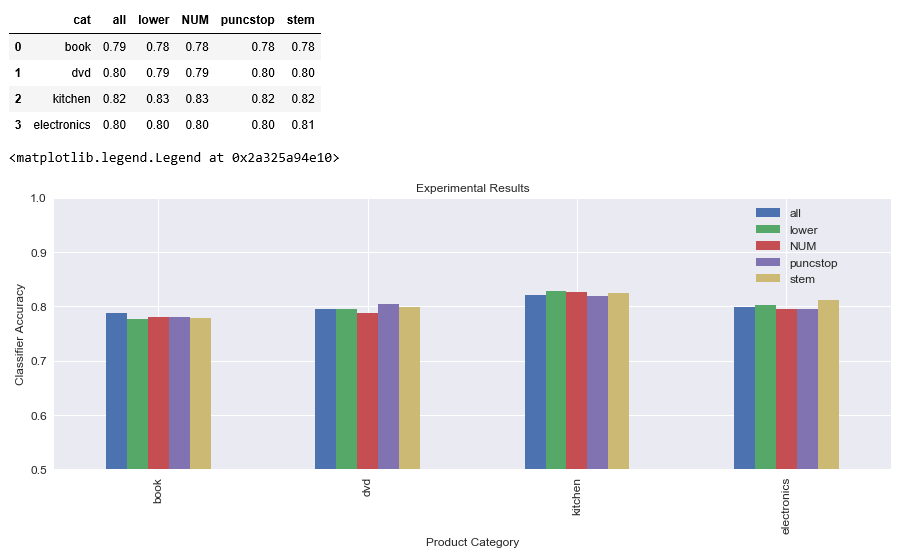

We can see from the results that nothing too interesting is happening. For each feature, having it extracted from the data barely affects NB classifier's performance. For some categories, like electronics, none but one feature, when extracted, has some degree of impact on the accuracy of the classifier (the accuracy is 1% higher if we cut all of the words in the reviews to their stems).  On the contrary, for other domains, after extracting certain features ('NUM' and 'lower' for dvd) have a negative (yet still very little) impact on the accuracy, decreasing it by just 1%.
I assume, that these particular features being extracted from the data neither take, nor give any useful information for the classifier to be significantly more or less accurate, at least for the given type of data. 

## Section 2

### 2.1

In [ ]:
def opinion_extractor(aspect_token, parsed_sentence):
    opinions = list()    
    for token in parsed_sentence:
        if token.pos_ == 'NOUN' and token.orth_ == aspect_token:            
            # recursive call of the extractor on the subtree of aspect_token (excluding aspect token from subtree)
            opinion_extractor(token.orth_, [t for t in token.subtree if not t == token])            
        # check for one of the following conditions for current token (always an adjective in our case) to be true
        elif (token.dep_ == 'acomp' or token.dep_ == 'amod' or token.dep_ == 'conj') and noun_relation(token, aspect_token):
            # call helper function to determine if token has adverbial modifiers 
            if has_advmod(token):               
                # recursive call of the extractor on the subtree of current token (excluding current token from subtree)
                opinion_extractor(token.orth_, [t for t in token.subtree if not t == token])
            else:                
                # add simple opinion to the list (call is_neg function to add a negative if needed)
                opinions.append(is_neg(token) + token.orth_)
        # check if current token is 
        elif token.dep_ == 'advmod':            
            # add compound opinion to the list (call is_neg function to add a negative if needed)
            opinions.append(is_neg(token) + token.orth_ + "-" + token.head.orth_)
    return opinions

def noun_relation(token, ancestor): # function that checks if a token has a distant (or otherwise) relation another token
    for anc in token.ancestors:
        if anc.orth_ == ancestor:
            return True
        elif anc.pos_ == 'VERB':
            for kid in anc.children:
                if kid.orth_ == ancestor:
                    return True

def is_neg(token): # function for adding "not-" to the final opinion if there exists a negative relation
    if has_neg(token) or has_neg(token.head): # calling helper function to determine a negative relation
        return "not-"
    return ""

def has_neg(token): # helper function to find if some token has 'neg' relation with any of its children
    for child in token.children:
        if child.dep_ == 'neg':
            return True
        
def has_advmod(token): # helper function to find if one of its children is an adverbial modifier
    for child in token.children:
        if child.dep_ == 'advmod':
            return True

aspect_words = ["plot","characters","cinematography","dialogue"]
extensions = [doc[0] for doc in core]
sentences = [doc[1] for doc in core]
expected = [doc[2] for doc in core]
opinions = [[opinion_extractor(word, nlp(doc[1])) for word in aspect_words if word in doc[1]] for doc in core]

# code for displaying results of the applying the opinion extractor to sentences in 'core'
df = pd.DataFrame(list(zip(extensions, sentences, expected, opinions)), 
                  columns = ["Extension", "Sentence", "Expected", "Opinion"])
display(df)

The code for my version of opinion extractor with comments and all additional functions is presented above. 

The extractor is mostly based on recursion, but also makes use of a few helper functions. It takes an aspect token and a sentence, converted into a dependency tree by spaCy, as arguments. I single for-loop is used to iterate over the parsed_sentence argument (which changes according to the recursive calls). For each iteration it will do the following operations: 
- check if the token that the iterator currently points at is a noun that is our aspect token and having found it, call the opinion extractor on the subtree of the noun token. The subtree function returns all descendents of a token including that token. We don't want that, as it will cause infinite recursive calls to the opinion extractor. This is why I build the subtree with list comprehension, which allows me to not include the aspect token in the subtree. Also, for all recursive calls we keep dragging along the aspect token, which we will need to later check if some tokens are related to it in any way.


- check if the current token is in one of the relations. Checking for 'acomp' allows us to include adjectives that are related directly to a parent noun, while 'acomp' condition allows those adjectives that are connected to the aspect word via copula. The 'conj' condition checks for token to be a conjunct, and as the whole function is recursive, it will include all of the conjuncts if there's a sequence of them in a sentence. Here we also check if a token (adjective) has a distant (or direct) relation with the aspect_token, or via copula verb.
     - if the token is in one of the above relations, the extractor will then deal with the case of the adjective having adverbial modifiers by first calling the has_advmod helper function. If it returns true, there will be another recursive call, otherwise, an opinion (current token) is added to the opinions list
     
    
- the last part (elif token.dep == 'advmod') is simply for adding a compound opinion into the opinions list, which at this point is going to be a current 'advmod' token, and its adjective parent (head). 


Should be noted, that as the function is recursive, it conveniently allows for all of the tokens to be considered by the function, which helps in cases , for example, of having a sequence of conjuncts in a sentence, allows to include all of them to the final list.

### 2.2
My version of opinion extractor has successfully produced the correct output for each of the five required extensions, when given the corresponding sentences from the 'core' list.
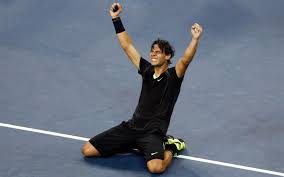
The results are shown below.

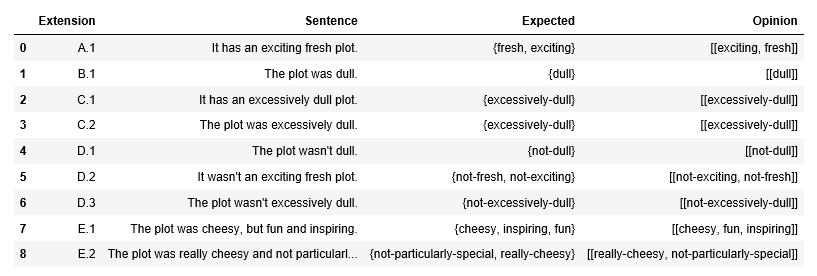

## Section 3
### 3.1
The code below sets up a sample collection of sentences from Amazon DVD reviews and for the target words calculates in how many of the sample sentences each of those words has occurred.

In [30]:
seed(164835) 

def target_sentence(sentence,target_tokens):
    for token in sentence:
        if token.orth_ in target_tokens:
            target_tokens_in_sample[token.orth_] += 1
            return True
    return False    

target_tokens = {"plot","characters","cinematography","dialogue"}
target_tokens_in_sample = {"plot": 0,"characters": 0,"cinematography": 0,"dialogue": 0}
sample_size = 100
my_sample = []
num_found = 0
while num_found < sample_size:
    review = random.choice(dvd_reviews)
    parsed_review = nlp(review)
    sentence = random.choice(list(parsed_review.sents))
    if target_sentence(sentence,target_tokens):
        my_sample.append(sentence)
        num_found += 1

words = [w for w in target_tokens_in_sample.keys()]
counts = [c for c in target_tokens_in_sample.values()]
df = pd.DataFrame(list(zip(words, counts)), columns = ["Target word", "Sentences"])
display(df)
print("my_sample size: {}".format(len(my_sample)))

,Target word,Sentences
0,plot,36
1,characters,48
2,cinematography,6
3,dialogue,10


my_sample size: 100


From the results above, we see can see how many sentences contain each of our target words. The sum of occurrances gives us a 100, which indeed matches the length of my_sample list of sentences.

### 3.2

In [73]:
def opinion_extractor(aspect_token, parsed_sentence):
    opinions = list()
    for token in parsed_sentence:
        if token.pos_ == 'NOUN' and token.orth_ == aspect_token:
            opinion_extractor(aspect_token, [t for t in token.subtree if not t == token])
        if noun_relation(token, aspect_token):
            if (token.dep_ == 'acomp' or token.dep_ == 'amod' or token.dep_ == 'conj') and noun_relation(token, aspect_token):
                if has_advmod(token):
                    opinion_extractor(aspect_token, [t for t in token.subtree if not t == token])
                else:
                    opinions.append(is_neg(token) + token.orth_) 
            elif token.dep_ == 'advmod':
                opinions.append(is_neg(token) + token.orth_ + "-" + token.head.orth_)
    return opinions

def noun_relation(token, ancestor):
    for anc in token.ancestors:
        if anc.orth_ == ancestor:
            return True
        elif anc.pos_ == 'VERB':
            for kid in anc.children:
                if kid.orth_ == ancestor:
                    return True

def is_neg(token):
    if has_neg(token) or has_neg(token.head):
        return "not-"
    return ""

def has_neg(token):
    for child in token.children:
        if child.dep_ == 'neg':
            return True
        
def has_advmod(token):
    for child in token.children:
        if child.dep_ == 'advmod':
            return True
        
#-------------------------------------------------------------------------------------------------------------------        
#save_file_path = r"C:\Users\ak581\savefile.txt"

#with open(save_file_path, "w") as save_file:
#    for sentence in my_sample:
#        for aspect_token in target_tokens:
#            opinions = opinion_extractor(aspect_token,sentence)
#            if opinions:
#                save_file.write("--- Sentence ---\n{0}\nOpinions on '{1}'\n{2}\n".
#                                format(sentence,aspect_token,opinions))


for sent in my_sample:
    for word in aspect_words:
        if(opinion_extractor(word, sent)):
            print("Sentence: {}".format(sent))
            print("\tOpinion of '{}':".format(word))            
            print("\t   ", opinion_extractor(word, sent))
            print("--------------------------------------------------------------------------------------------")
            print("--------------------------------------------------------------------------------------------")

Sentence: The characters are all very likeable.
	Opinion of 'characters':
	    ['very-likeable']
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Sentence: so I'm supposed to believe that the horrible dialogue, bad acting, and ridiculous plotting is on purpose just because Mamet is a respected guy? how about we call a dog a dog and just move on

	Opinion of 'dialogue':
	    ['horrible', 'ridiculous', 'plotting', 'just-is', 'respected']
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Sentence: Like all other futuristic films, there always seems to be a handful of strange and disgusting minor characters which throws the film into the "weird category."  
	Opinion of 'characters':
	    ['strange', 'disgusting', 'minor',

--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Sentence: It's for anyone who has a longing to "escape" the everyday just for awhile...just a fun story, charming characters, and a wonderful love story that makes you want to fly off to Rome

	Opinion of 'characters':
	    ['charming', 'wonderful', 'story', 'off-fly']
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Sentence: And Michelle always looks adorable.  Loved the plot, perfect family, perfect house, perfect dog, perfect friends, perfect husband, a scientist with a big salary no less, perfect size 2 wife, and something hidden, dirty and horrifying to screw it all up.  
	Opinion of 'plot':
	    ['always-looks', 'adorable', 'perfect', 'perfect', 'perfect', 'dog'

The cell below is a breakdown of the results for each sentence. 

1. correct
2. incorrect
3. incorrect
4. incorrect
5. incorrect
6. incorrect
7. incorrect
8. incorrect
9. incorrect
10. incorrect
11. correct
12. incorrect
13. incorrect
14. correct
15. incorrect
16. correct
17. incorrect
18. incorrect
19. correct
20. incorrect
21. incorrect 
22. incorrect
23. incorrect 
24. incorrect
25. correct
26. incorrect 
27. incorrect
28. correct
29. incorrect
30. incorrect
31. correct
32. correct
33. incorrect
34. incorrect
35. incorrect
36. incorrect
37. incorrect 
38. incorrect
39. incorrect
40. incorrect
41. correct
42. correct
42. correct
43. incorrect
44. correct
45. incorrect
46. correct
47. incorrect 
48. correct
49. incorrect
50. correct
51. incorrect
52. correct
53. incorrect
54. correct
55. incorrect
56. incorrect

As we can see, the final list is almost twice as short as the my_sample list. I did not include the duplicates of the sentences (which there were 3 of them), but the main reason for such a cut down, is that the results do not include those  sentences, for which the extractor was not able to produce an output (i.e. produced empty list of opinions). 

The sentences that are marked as 'correct' are those that had a perfectly correct and clear opinion (or list of opinions) extracted from them (like in the core examples). The incorrect ones, are those that had corrupted outputs, e.g. that had the correct opinion on one of the target words, but included irrelevant additional opinions; or ones with completely mixed up redundant opinions (e.g. ['in', 'so-falls']).

### Extensions
I calculated the number of sentences were each of the extensions applied. 

- **Extension A** was applied in 37 sentences. This is the highest from all the other extensions, which is understandable, cause having a noun with an adjectival modifier is quite a common language construct. 
- **Extension B** usage occured in 16 sentence, which I found surprising, as it's still probably a more common case in the language, yet the result is more than twice as small as for extension A. Interesting.
- **Extension C** is the second most commonly applied in my results, with 31 cases of usage. Here, I think, the high number is explained by corrupted dependency trees, were adverbial modifiers were found where gramatically the should't exist.

            --- Sentence ---
            This movie is chock full of great characters, even in some of the smallest of roles - and it's not just the people, for the small town in which the story takes place is quite a character unto itself.  
            Opinions on 'characters'
            ['great', 'even-in']
            
- **Extension D** was only applied in 4 sentences. 
- **Extension E** was applied in 6 sentences.

The sum of the results above gives us more than 57, which is explained by multiple extensions being applied in the same sentences.

### Overall performance

So the results of applying my opinion extractor to the sentences in my_sample are as follows:

        Correctly analysed sentences: 18
        Sentences analysed incorrectly: 39
        
        Overall: 31.58 % analysed correctly
        
The correctly analysed sentences are mostly either rather short and simple (like some in the 'core' list from section 2) or have a perfectly correct dependency tree.

        --- Sentence ---
        The characters are all very likeable.
        Opinions on 'characters'
        ['very-likeable']
        
        --- Sentence ---
        Bad for anyone who wants high production value or an identifiable plot
        Opinions on 'plot'
        ['identifiable']
        
The second example doesn't really give us an opinion on the plot, but technically, the extractor performed correctly here, because there's a direct clear 'amod' dependency between aspect word 'plot' and adjective 'identifiable', so the extractor has enough features an is accurate enough to produce the correct output.

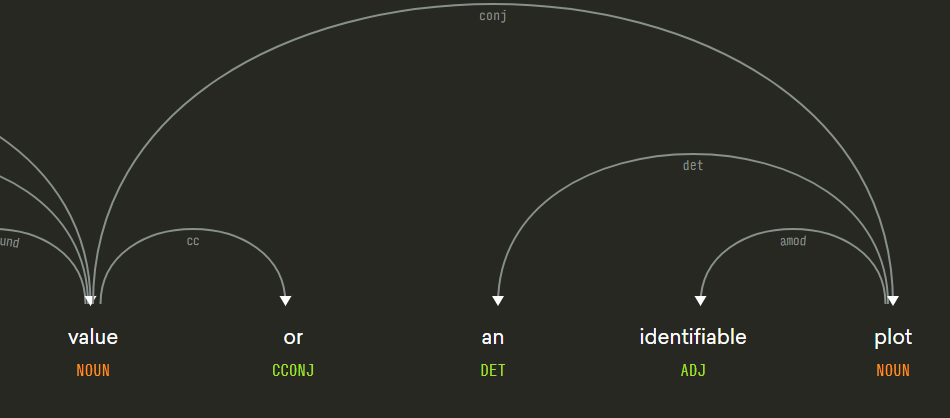


Yet, a lot of the sentences I labeled as incorrectly analysed. 

        --- Sentence ---
        Well, nice cinematography as set-designer work: nicely interiors and well dressed actors.
        Opinions on 'cinematography'
        ['nice', 'set', 'nicely-interiors', 'dressed', 'actors']
        
In examples like above, my extracotor seems to be having problems taking only the aspect word into account We can see one correct opinion 'nice' on cinematography, but there's quite a bit of unwanted irrelevant data. We can also see a merge of a noun and adverbial modifier 'nicely-interiors'. The possible solution to the problem is to introduce a more reliable mechanism of keeping only the aspect word intact while analysing the sentence. Although, the other possible reason for problem, is an incorrect dependency tree or a mistake in the part of speach tagger. 

        --- Sentence ---
        The movie appeals with its intricate plot - an ingenious web awaited the almost helpless William Hurt, who was dazzled by the beauty of Kathleen Turner and whose mind was, no doubt, slowed by the intense heat.
        Opinions on 'plot'
        ['intricate']
        
The sentence above is quite long and gramatically complicated for the extractor, yet it managed to only include the relevant opinion about a relevant aspect token, dispite the sentence having multiple other nouns, which was the issue in the previous example. The dependency trees 

        --- Sentence ---
        This movie is chock full of great characters, even in some of the smallest of roles - and it's not just the people, for the small town in which the story takes place is quite a character unto itself.  
        Opinions on 'characters'
        ['great', 'even-in']
        
For this sentence, the opinion on characters is 'great', which the extracotor successfully included in the opinions list, but there's also a second 'opinion', which simply doesn't make any sence. I investigated the dependency tree of the sentence and there clearly was no relation (either direct or distant) between 'characters' and 'even-in', neither there was an appropriate relationship used in the extractor between 'even-in' and some other noun. 

### 3.3
Judging from the results in previous section, my version of opinion extactor could use some major improvements. There examples in the reviews, when the opnion on something is represented not as one of our extensions, but as a long gramatically complex structure, like a description of reviewers opinion. Udentifying such complex opinions would be a major upgrade for the extractor. As for the deficiencies, the extractor has shown cases of including not just the adjectivial conjunctions, but also those that are nouns. I'm not sure whether it's should be allowed or not, but as for the extensions, I'd say that could be fixed by simply including a condition of token with 'conj' relationship to be an adjective. 

And this is the end of my submission. Thank you,  I'm out. Peace.
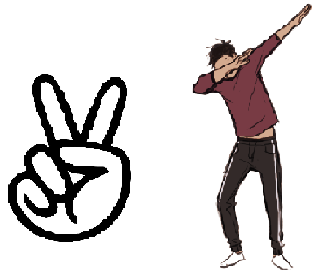